## HW 5

In [1]:
import numpy as np
import math

In [2]:
"""
P1
"""

"""
x = np.array([-1,  0, 1,  2])
y = np.array([ 3, -4, 5, -6])
"""

x = np.array(  [2,   2.75,   4])
y = np.array([1/2, 1/2.75, 1/4])


def LIP(x, y, xApp):
    
    # Get n and fill l with ones.
    n = len(x)
    l = np.ones(n)
    
    # i is the l number we are on, j is the x
    for i in range(n):
        for j in range(n):
            if i != j:
                l[i] *= (xApp - x[j]) / (x[i] - x[j])
         
    # Set yApp to zero and sum l and y parts.
    yApp = 0
    for i in range(n):
        yApp += l[i] * y[i]
    
    return yApp
    
print(LIP(x, y, 3))

0.329545454545


In [3]:
"""
P2
"""

"""
x = np.array([-1,  0, 1,  2])
y = np.array([ 3, -4, 5, -6])
"""

x = np.array(  [2,   2.75,   4])
y = np.array([1/2, 1/2.75, 1/4])


def devidedDif(x, y, xApp):
    
    n = len(x)
    yApp = 0
    a = np.zeros([n,n])
    a[:,0] = y
    
    for j in range(1,n):
        for i in range(j,n):
            a[i,j] = (a[i,j-1] - a[i-1,j-1]) / (x[i] - x[i-j])
        
    for i in range(n):
        hold = 1.0
        for j in range(i):
            hold *= xApp - x[j]

        yApp += a[i,i] * hold
        
    return yApp

print(devidedDif(x,y,3))

0.329545454545


In [4]:
"""
P3
"""

def leastSquares(x, y, xApp):
    
    xSq = np.zeros(len(x))
    for i in range(len(x)):
        xSq[i] = math.pow(x[i],2)
    
    # Define top and bottom sum / product for beto zero.
    b0Top    = ( sum(xSq) * sum(y) ) - ( sum(x*y) * sum(x) )
    bottom = ( len(x) * sum(xSq) - math.pow(sum(x),2) )
    b0       =   b0Top / bottom
    
    # Define top sum / product for beta one
    b1Top    = ( len(x) * sum(x*y) - (sum(x) * sum(y)) )
    b1       =   b1Top / bottom
    
    # Solve for y-approximation
    yApp = b0 + b1 * xApp
    
    return yApp
    
x = np.array([  1,   2,   3, 4, 5,   6,    7,    8,  9,   10]) 
y = np.array([1.3, 3.5, 4.2, 5, 7, 8.8, 10.1, 12.5, 13, 15.6])    
xApp = 1.5
print(leastSquares(x,y,xApp))

1.94727272727


In [5]:
"""
P4
"""

act = np.array([28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 29, 28, 27, 29, 21, 28, 28, 26, 30, 25])
gpa = np.array([3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81])
leastSquares(act, gpa, 26)

3.1023011015911064

In [6]:
"""
P5
"""

from sklearn.datasets import load_digits
from sklearn.preprocessing import normalize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [7]:
x = load_digits().data
y = load_digits().target
x = normalize(x, axis = 0)
ind = np.where(y == 4)[0]
y = (y == 4) * 1

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

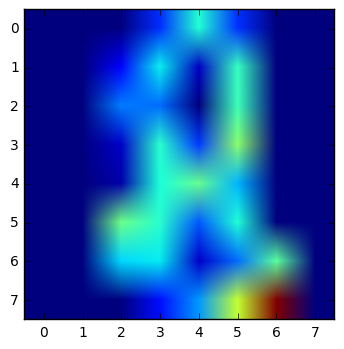

In [9]:
plt.imshow(X_train[0].reshape(8, 8))

In [10]:

def E(x, y, a, b):
    
    p = len(x[0])
    n = len(x)
    E = 0
    
    for i in range(n):
        hold = 0
        ySombrero = a
        for j in range(p):
            ySombrero += b[j] * x[i,j]
            
        hold = y[i] - ySombrero
        E += math.pow(hold, 2)
    
    return E
        
    
def grad_alpha(x, y, a, b):

    grad = 0
    p = len(x[0])
    n = len(x)
    holdOut = 0
    
    for i in range(n):
        holdIn = 0
        for j in range(p):
            holdIn += b[j] * x[i,j]
        holdOut += y[i] - (a + holdIn)
    
    return holdOut * -2.0


def grad_beta(x, y, a, b, k):

    grad = 0
    p = len(x[0])
    n = len(x)
    holdOut = 0
    
    for i in range(n):
        holdIn = 0
        for j in range(p):
            holdIn += b[j] * x[i,j]
        holdOut += (y[i] - (a + holdIn)) * x[i,k]
    
    return holdOut * -2.0
        

def lin_reg(x, y):
    
    p = len(x[0])
    aOld = 0
    aNew = 0
    bOld = np.zeros(p)
    bNew = np.zeros(p)
    gamma = 0.0001
    max_iterations = 2000
    
    for i in range(max_iterations):
        
        # Update E
        Eold = E(x, y, aOld, bOld)
        # Update a
        aNew = aOld - (gamma * grad_alpha(x, y, aOld, bOld))
        
        for j in range(p):
            
            # Update beta
            bNew[j] = bOld[j] - (gamma * grad_beta(x, y, aOld, bOld, j))
            
        # Update E
        Enew = E(x, y, aNew, bNew)
        
        # Check if tolerance has been met.
        if abs(Enew - Eold) < 1e-5:
            break
        if i % 200 == 0:
            print(i, ' ', Enew)
            
        aOld = aNew
        bOld = bNew
    
    return aNew, bNew

In [11]:
a,b = lin_reg(X_train, Y_train)

0   125.8342967556641
200   108.5526630461156
400   99.92033182742405
600   92.74701768230828
800   86.75004132302998
1000   81.70469958420838
1200   77.43201509141667
1400   73.78912142084293
1600   70.66171000562845
1800   67.95809098171767


In [12]:
"""
P6
"""

yiHat = np.zeros(len(Y_test))

for i in range(len(Y_test)):
    yiHat[i] = a + np.dot(b, X_test[i,:])
    
for i in range(len(Y_test)):
    if yiHat[i] < 0.3:
        yiHat[i] = 0
    else:
        yiHat[i] = 1
    
Error = 0

for i in range(len(Y_test)):
    Error += abs(yiHat[i] - Y_test[i])
    
percentCor = (1 - Error / len(Y_test)) * 100

print(percentCor)

97.1111111111
